# Safest Aircraft Exploratory Data Analysis

## Load and Examine the Data

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# set the option to display all columns
pd.set_option('display.max_columns', None)

# set figsize for seaborn plots
sns.set_theme(rc={'figure.figsize': (15, 7)})

# default color palette for seaborn plots
default_palette = sns.color_palette()

In [2]:
# load aviation accidents data into a DataFrame
df = pd.read_csv('../data/Aviation_Data.csv', low_memory=False)

In [3]:
# examine example of the data
df.head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,Non-Fatal,Substantial,Airplane,CF-TLU,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,Part 129: Foreign,SCHD,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N4988E,Cessna,180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,Non-Fatal,Substantial,Airplane,N2482N,Cessna,140,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,Non-Fatal,Substantial,Airplane,N7967Q,Cessna,401B,No,2.0,Reciprocating,Part 91: General Aviation,NaN,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,Non-Fatal,Substantial,NaN,N3906K,North American,NAVION L-17B,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


In [4]:
# examine information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

## Data Cleaning

In [5]:
# check for missing values
df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

### Check and remove duplicates

In [6]:
# check for duplicates
df[df.duplicated()]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
64050,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64052,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64388,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64541,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64552,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89956,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90004,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90010,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90031,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# remove duplicates
df_cleaned = df.drop_duplicates()
df_cleaned

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [8]:
# double check all duplicates removed
df_cleaned[df_cleaned.duplicated()]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date


In [9]:
# check missing values again (after duplicates removed)
df_cleaned.isna().sum()

Event.Id                     69
Investigation.Type            0
Accident.Number              69
Event.Date                   69
Location                    121
Country                     295
Latitude                  54576
Longitude                 54585
Airport.Code              38709
Airport.Name              36168
Injury.Severity            1069
Aircraft.damage            3263
Aircraft.Category         56671
Registration.Number        1386
Make                        132
Model                       161
Amateur.Built               171
Number.of.Engines          6153
Engine.Type                7146
FAR.Description           56935
Schedule                  76376
Purpose.of.flight          6261
Air.carrier               72310
Total.Fatal.Injuries      11470
Total.Serious.Injuries    12579
Total.Minor.Injuries      12002
Total.Uninjured            5981
Weather.Condition          4561
Broad.phase.of.flight     27234
Report.Status              6450
Publication.Date          15299
dtype: i

### Handle missing values

#### Features with a high percentage of missing values

In [10]:
# Original DataFrame: 90348 rows x 31 columns
# Duplicates removed: 88958 rows × 31 columns
# FAR: Federal Aviation Regulations

#Latitude                  54576 (61%) --> drop, not crucial to analysis
#Longitude                 54585 (61%) --> drop, not crucial to analysis
#Airport.Code              38709 (43%) --> drop, not crucial to analysis
#Airport.Name              36168 (40%) --> drop, not crucial to analysis
#Aircraft.Category         56671 (63%) --> replace NaN with 'Airplane' category (mode)
#FAR.Description           56935 (64%) --> drop, not crucial to analysis
#Schedule                  76376 (85%) --> drop, not crucial to analysis
#Air.carrier               72310 (81%) --> drop, not crucial to analysis

#df_cleaned['Latitude'].value_counts()
#df_cleaned['Longitude'].value_counts()
#df_cleaned['Airport.Code'].value_counts()
#df_cleaned['Airport.Name'].value_counts()
#df_cleaned['Aircraft.Category'].value_counts()
#df_cleaned['FAR.Description'].value_counts()
#df_cleaned['Schedule'].value_counts()
#df_cleaned['Air.carrier'].value_counts()
#"Unknown" in df_cleaned['Air.carrier'].value_counts()

# drop columns with a high percentage of missing values and are not crucial to the analysis
df_cleaned = df_cleaned.drop(columns=['Latitude', 'Longitude', 'Airport.Code', 
                                      'Airport.Name', 'FAR.Description', 'Schedule', 
                                      'Air.carrier'], axis=1)
df_cleaned

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [11]:
# check missing values again (after dropping columns)
df_cleaned.isna().sum()

Event.Id                     69
Investigation.Type            0
Accident.Number              69
Event.Date                   69
Location                    121
Country                     295
Injury.Severity            1069
Aircraft.damage            3263
Aircraft.Category         56671
Registration.Number        1386
Make                        132
Model                       161
Amateur.Built               171
Number.of.Engines          6153
Engine.Type                7146
Purpose.of.flight          6261
Total.Fatal.Injuries      11470
Total.Serious.Injuries    12579
Total.Minor.Injuries      12002
Total.Uninjured            5981
Weather.Condition          4561
Broad.phase.of.flight     27234
Report.Status              6450
Publication.Date          15299
dtype: int64

In [12]:
# for Aircraft.Category replace NaN values with 'Airplane' category (mode)
df_cleaned['Aircraft.Category'] = df_cleaned['Aircraft.Category'].fillna('Airplane')
df_cleaned['Aircraft.Category'].value_counts()

Airplane             84288
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

In [13]:
# check missing values again (after updating Aircraft.Category column)
df_cleaned.isna().sum()

Event.Id                     69
Investigation.Type            0
Accident.Number              69
Event.Date                   69
Location                    121
Country                     295
Injury.Severity            1069
Aircraft.damage            3263
Aircraft.Category             0
Registration.Number        1386
Make                        132
Model                       161
Amateur.Built               171
Number.of.Engines          6153
Engine.Type                7146
Purpose.of.flight          6261
Total.Fatal.Injuries      11470
Total.Serious.Injuries    12579
Total.Minor.Injuries      12002
Total.Uninjured            5981
Weather.Condition          4561
Broad.phase.of.flight     27234
Report.Status              6450
Publication.Date          15299
dtype: int64

#### Check Make and Model have values

It's crucial that we have the Make and/or Model of the aircraft in order to identify the aircraft.

In [14]:
# check if aircraft make and model have a value
df_cleaned.loc[(df_cleaned['Make'].isna()) & (df_cleaned['Model'].isna())]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
49759,20010329X00666,Incident,DCA01WA007,2000-11-28,"Nairobi, Kenya",Kenya,Incident,Minor,Airplane,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Foreign,NaN
50025,20010202X00389,Accident,MIA01WA069,2001-01-31,"YOPAL, Colombia",Colombia,Fatal(3),Destroyed,Airplane,NaN,NaN,NaN,No,2.0,NaN,NaN,3.0,3.0,NaN,NaN,VMC,NaN,Foreign,NaN
54773,20030619X00910,Accident,DCA03WA039,2003-06-06,"Christchurch, New Zealand",New Zealand,Fatal(8),Destroyed,Airplane,NaN,NaN,NaN,No,NaN,NaN,NaN,8.0,2.0,NaN,NaN,NaN,NaN,Foreign,19-06-2003
54873,20030619X00911,Accident,DCA03WA040,2003-06-17,"EELDE, NETHERLANDS",Netherlands,Non-Fatal,Substantial,Airplane,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,4.0,146.0,NaN,NaN,Foreign,19-06-2003
58803,20050616X00790,Incident,DCA05WA073,2005-06-10,Canada/US borde,NaN,Incident,NaN,Airplane,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Foreign,21-06-2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89440,NaN,02-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,Airplane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89492,NaN,05-08-2022,NaN,NaN,NaN,NaN,NaN,NaN,Airplane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89763,NaN,08-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,Airplane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89943,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,Airplane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# drop rows where make and model are NaN
make_model_nan = df_cleaned['Make'].isna() & df_cleaned['Model'].isna()
df_cleaned = df_cleaned[~make_model_nan]
df_cleaned

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Airplane,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Airplane,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Airplane,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Airplane,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Airplane,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,Airplane,N1867H,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,Airplane,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,Airplane,N210CU,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [16]:
# check missing values again (after removing those without a Make and Model)
df_cleaned.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     225
Injury.Severity             984
Aircraft.damage            3178
Aircraft.Category             0
Registration.Number        1283
Make                         20
Model                        49
Amateur.Built               101
Number.of.Engines          6043
Engine.Type                7035
Purpose.of.flight          6153
Total.Fatal.Injuries      11397
Total.Serious.Injuries    12506
Total.Minor.Injuries      11928
Total.Uninjured            5907
Weather.Condition          4457
Broad.phase.of.flight     27122
Report.Status              6352
Publication.Date          15228
dtype: int64

#### Categorical features with some missing values

In [17]:
# Investigate values for 14 categorical features still with missing values
#Location                     52 --> keep and use "Unknown" category
#Country                     225 --> keep and use "Unknown" category
#Injury.Severity             984 --> keep and add "Unknown" category
#Aircraft.damage            3178 --> replace with mode value
#Registration.Number        1283 --> keep and use "Unknown" category & merge "NONE" and "None"
#Make                         20 --> keep and use "Unknown" category
#Model                        49 --> keep and use "Unknown" category
#Amateur.Built               101 --> keep and add "Unknown" category
#Engine.Type                7035 --> keep and use "Unknown" category & merge "NONE" and "None"
#Purpose.of.flight          6153 --> keep and use "Unknown" category
#Weather.Condition          4457 --> keep and use "UNK" category & merge "UNK" and "Unk"
#Broad.phase.of.flight     27122 --> keep and use "Unknown" category
#Report.Status              6352 --> keep and add "Unknown" category
#Publication.Date          15228 --> drop column, not crucial for analysis

#df_cleaned['Publication.Date'].value_counts() 
#"Unknown" in df_cleaned['Report.Status'].value_counts()

**Amateur.Built:** In the context of aircraft, "amateur-built" means an aircraft constructed or assembled by individuals for their own education or recreation, rather than for commercial purposes.

**Weather.Condition:** Visual Meteorological Conditions (VMC) in aviation refer to weather conditions where pilots can navigate safely using visual references (like the ground and other aircraft). 

In aviation, Instrument Meteorological Conditions (IMC) refers to weather conditions where visibility is too poor for pilots to navigate using their natural vision, requiring them to rely on instruments instead. These conditions typically involve low visibility due to clouds, fog, rain, or other phenomena. 

"UNK" in a weather context typically means "unknown" or "unidentified." It indicates that the specific weather condition is not known or has not been identified by the weather reporting system. This could be due to a variety of reasons, such as a faulty sensor, a misreading, or a lack of available information. 

In [18]:
# drop Publication.Date column
df_cleaned = df_cleaned.drop(columns=['Publication.Date'], axis=1)
df_cleaned

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Airplane,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Airplane,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Airplane,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Airplane,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Airplane,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,Airplane,N1867H,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,Airplane,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,Airplane,N210CU,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [19]:
# for Location replace NaN values with 'Unknown' category
df_cleaned['Location'] = df_cleaned['Location'].fillna('Unknown')
df_cleaned[df_cleaned['Location'] == "Unknown"]['Location'].count()

53

In [20]:
# for Country replace NaN values with 'Unknown' category
df_cleaned['Country'] = df_cleaned['Country'].fillna('Unknown')
df_cleaned[df_cleaned['Country'] == "Unknown"]['Country'].count()

228

In [21]:
# for Injury.Severity replace NaN values with 'Unknown' category
df_cleaned['Injury.Severity'] = df_cleaned['Injury.Severity'].fillna('Unknown')
df_cleaned[df_cleaned['Injury.Severity'] == "Unknown"]['Injury.Severity'].count()

984

In [22]:
# for Aircraft.damage replace NaN values with mode value
df_cleaned['Aircraft.damage'] = df_cleaned['Aircraft.damage'].fillna('Substantial')
df_cleaned['Aircraft.damage'].value_counts()

Substantial    67314
Destroyed      18617
Minor           2796
Unknown          119
Name: Aircraft.damage, dtype: int64

In [23]:
# for Registration.Number replace NaN values with 'Unknown' category
df_cleaned['Registration.Number'] = df_cleaned['Registration.Number'].fillna('Unknown')
df_cleaned['Registration.Number'].value_counts()

Unknown    1286
NONE        344
UNREG       125
None         65
UNK          13
           ... 
N994AT        1
N9396L        1
N34157        1
N8324A        1
N760AB        1
Name: Registration.Number, Length: 79097, dtype: int64

In [24]:
# for Registration.Number merge "NONE" and "None"
df_cleaned.loc[df_cleaned['Registration.Number'] == 'None', 'Registration.Number'] = 'NONE'
df_cleaned['Registration.Number'].value_counts()

Unknown    1286
NONE        409
UNREG       125
UNK          13
USAF          9
           ... 
N994AT        1
N9396L        1
N34157        1
N8324A        1
N760AB        1
Name: Registration.Number, Length: 79096, dtype: int64

In [25]:
# for Make replace NaN values with 'Unknown' category
df_cleaned['Make'] = df_cleaned['Make'].fillna('Unknown')
df_cleaned[df_cleaned['Make'] == "Unknown"]['Make'].count()

41

In [26]:
# for Model replace NaN values with 'Unknown' category
df_cleaned['Model'] = df_cleaned['Model'].fillna('Unknown')
df_cleaned[df_cleaned['Model'] == "Unknown"]['Model'].count()

50

In [27]:
# for Amateur.Built replace NaN values with 'Unknown' category
df_cleaned['Amateur.Built'] = df_cleaned['Amateur.Built'].fillna('Unknown')
df_cleaned[df_cleaned['Amateur.Built'] == "Unknown"]['Amateur.Built'].count()

101

In [28]:
# for Engine.Type replace NaN values with 'Unknown' category
df_cleaned['Engine.Type'] = df_cleaned['Engine.Type'].fillna('Unknown')
df_cleaned[df_cleaned['Engine.Type'] == "Unknown"]['Engine.Type'].count()

9086

In [29]:
# for Engine.Type merge "NONE" and "None"
df_cleaned.loc[df_cleaned['Engine.Type'] == 'None', 'Engine.Type'] = 'NONE'
df_cleaned['Engine.Type'].value_counts()

Reciprocating      69529
Unknown             9086
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Turbo Jet            703
NONE                  21
Geared Turbofan       12
Electric              10
LR                     2
Hybrid Rocket          1
UNK                    1
Name: Engine.Type, dtype: int64

In [30]:
# for Purpose.of.flight replace NaN values with 'Unknown' category
df_cleaned['Purpose.of.flight'] = df_cleaned['Purpose.of.flight'].fillna('Unknown')
df_cleaned[df_cleaned['Purpose.of.flight'] == "Unknown"]['Purpose.of.flight'].count()

12953

In [31]:
# for Weather.Condition replace NaN values with 'Unknown' category
df_cleaned['Weather.Condition'] = df_cleaned['Weather.Condition'].fillna('UNK')
df_cleaned[df_cleaned['Weather.Condition'] == "UNK"]['Weather.Condition'].count()

5313

In [32]:
# for Weather.Condition merge "UNK" and "Unk"
df_cleaned.loc[df_cleaned['Weather.Condition'] == 'Unk', 'Weather.Condition'] = 'UNK'
df_cleaned['Weather.Condition'].value_counts()

VMC    77295
IMC     5976
UNK     5575
Name: Weather.Condition, dtype: int64

In [33]:
# for Broad.phase.of.flight replace NaN values with 'Unknown' category
df_cleaned['Broad.phase.of.flight'] = df_cleaned['Broad.phase.of.flight'].fillna('Unknown')
df_cleaned[df_cleaned['Broad.phase.of.flight'] == "Unknown"]['Broad.phase.of.flight'].count()

27670

In [34]:
# for Report.Status replace NaN values with 'Unknown' category
df_cleaned['Report.Status'] = df_cleaned['Report.Status'].fillna('Unknown')
df_cleaned[df_cleaned['Report.Status'] == "Unknown"]['Report.Status'].count()

6352

In [35]:
# check for missing values again (after cleaning categorical columns)
df_cleaned.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category             0
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines          6043
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries      11397
Total.Serious.Injuries    12506
Total.Minor.Injuries      11928
Total.Uninjured            5907
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
dtype: int64

#### Check if Make and Model are both "Unknown"

In [36]:
# drop rows where make and model are Unknown as it won't be possible to identify the aircraft
make_model_unknown = (df_cleaned['Make'] == 'Unknown') & (df_cleaned['Model'] == 'Unknown')
df_cleaned = df_cleaned[~make_model_unknown]
df_cleaned

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Airplane,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Airplane,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Airplane,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Airplane,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Airplane,N15NY,Cessna,501,No,NaN,Unknown,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,Substantial,Airplane,N1867H,PIPER,PA-28-151,No,NaN,Unknown,Personal,0.0,1.0,0.0,0.0,UNK,Unknown,Unknown
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,Unknown,Substantial,Airplane,N2895Z,BELLANCA,7ECA,No,NaN,Unknown,Unknown,0.0,0.0,0.0,0.0,UNK,Unknown,Unknown
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,Unknown,Unknown
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,Unknown,Substantial,Airplane,N210CU,CESSNA,210N,No,NaN,Unknown,Personal,0.0,0.0,0.0,0.0,UNK,Unknown,Unknown


#### Numerical features with some missing values

**Number.of.Engines:** An aircraft can have zero engines. Specifically, gliders are designed to fly without engines. They rely on lift generated by their wings from moving air currents or by being towed aloft and then released. Even aircraft with engines, like commercial airliners, can glide for significant distances if their engines fail. 

In [37]:
df_cleaned['Number.of.Engines'].value_counts()

1.0    69580
2.0    11078
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64

In [38]:
df_cleaned['Number.of.Engines'].mean()

1.1465785850583319

In [39]:
df_cleaned['Number.of.Engines'].median()

1.0

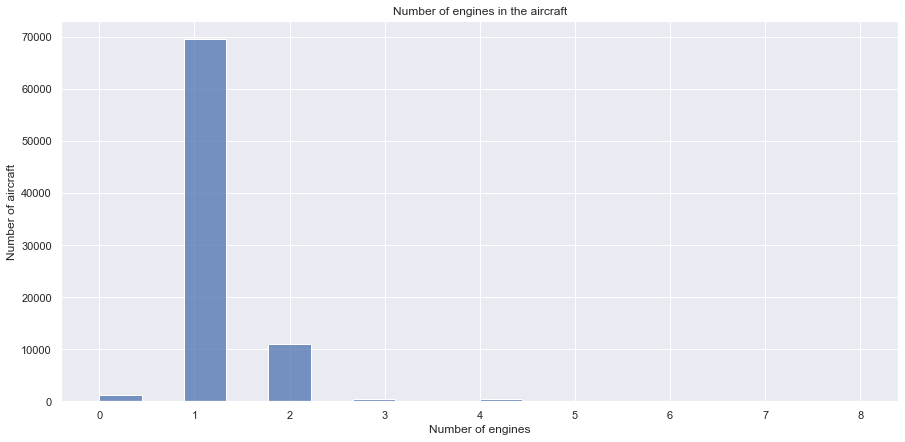

In [40]:
number_of_engines_histogram = sns.histplot(data=df_cleaned, x='Number.of.Engines')
number_of_engines_histogram.set(xlabel='Number of engines', ylabel='Number of aircraft', 
                                title='Number of engines in the aircraft');

In [41]:
# for Number.of.Engines replace NaN values with median value
number_of_engines_median = df_cleaned['Number.of.Engines'].median()
df_cleaned = df_cleaned.fillna({ 'Number.of.Engines': number_of_engines_median })
df_cleaned['Number.of.Engines'].value_counts()

1.0    75622
2.0    11078
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64

In [42]:
#Total.Fatal.Injuries      11397
#Total.Serious.Injuries    12506
#Total.Minor.Injuries      11928
#Total.Uninjured            5907
#df_cleaned['Total.Fatal.Injuries'].value_counts()
#df_cleaned['Total.Fatal.Injuries'].mean()
#df_cleaned['Total.Fatal.Injuries'].median()
#df_cleaned['Total.Serious.Injuries'].value_counts()
#df_cleaned['Total.Serious.Injuries'].mean()
#df_cleaned['Total.Serious.Injuries'].median()
#df_cleaned['Total.Minor.Injuries'].value_counts()
#df_cleaned['Total.Minor.Injuries'].mean()
#df_cleaned['Total.Minor.Injuries'].median()
#df_cleaned['Total.Uninjured'].value_counts()
#df_cleaned['Total.Uninjured'].mean()
#df_cleaned['Total.Uninjured'].median()

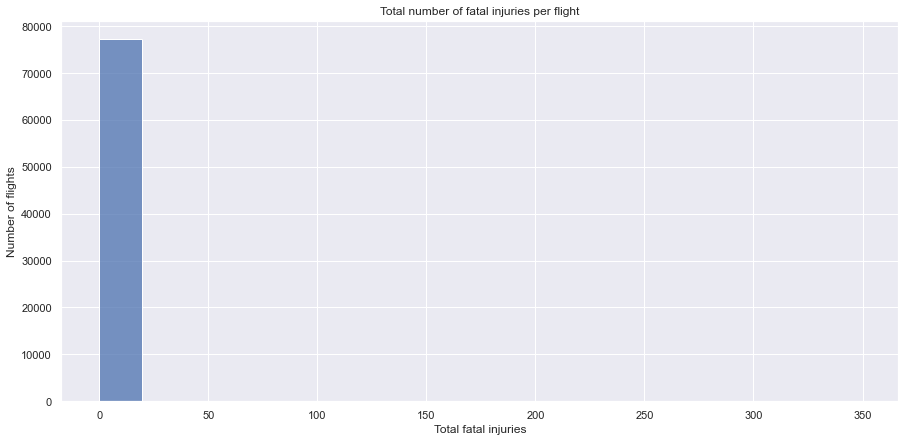

In [43]:
total_fatal_injuries_histogram = sns.histplot(data=df_cleaned, x='Total.Fatal.Injuries')
total_fatal_injuries_histogram.set(xlabel='Total fatal injuries', ylabel='Number of flights', 
                                title='Total number of fatal injuries per flight');

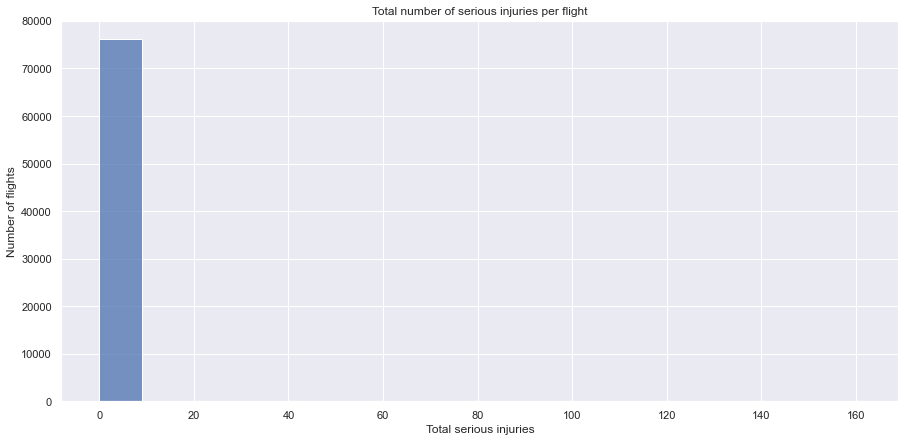

In [44]:
total_serious_injuries_histogram = sns.histplot(data=df_cleaned, x='Total.Serious.Injuries')
total_serious_injuries_histogram.set(xlabel='Total serious injuries', ylabel='Number of flights', 
                                title='Total number of serious injuries per flight');

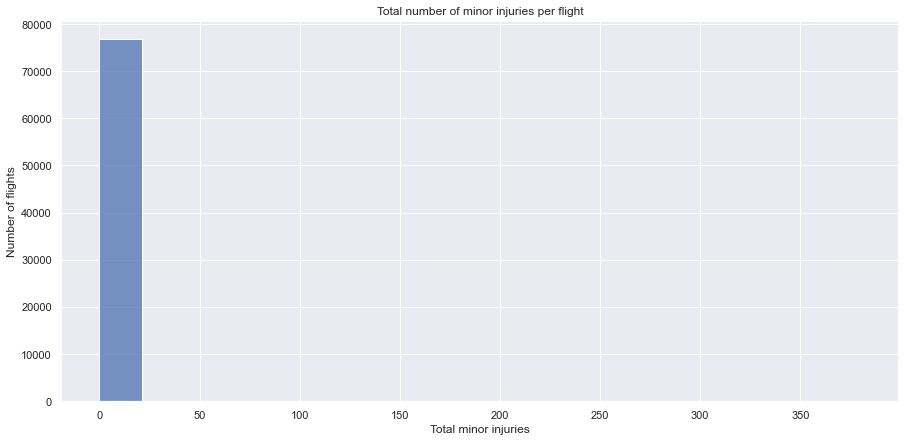

In [45]:
total_minor_injuries_histogram = sns.histplot(data=df_cleaned, x='Total.Minor.Injuries')
total_minor_injuries_histogram.set(xlabel='Total minor injuries', ylabel='Number of flights', 
                                title='Total number of minor injuries per flight');

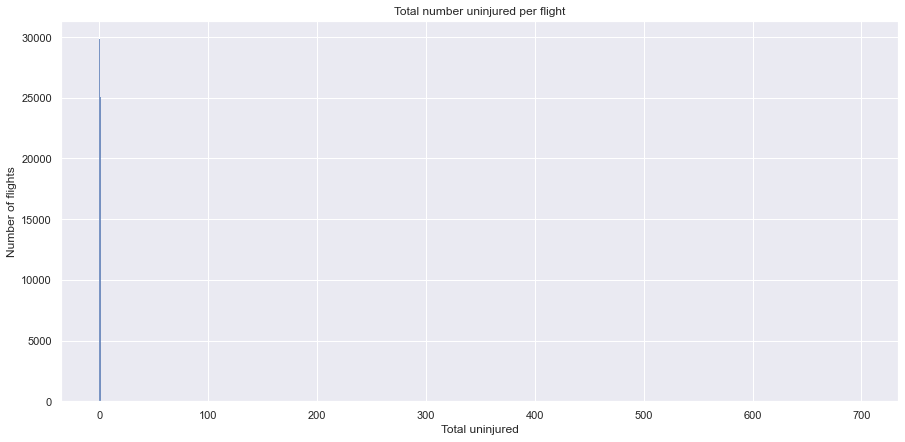

In [46]:
total_uninjured_histogram = sns.histplot(data=df_cleaned, x='Total.Uninjured')
total_uninjured_histogram.set(xlabel='Total uninjured', ylabel='Number of flights', 
                              title='Total number uninjured per flight');

In [47]:
# for Total.Fatal.Injuries replace NaN values with median value
total_fatal_injuries_median = df_cleaned['Total.Fatal.Injuries'].median()
df_cleaned = df_cleaned.fillna({ 'Total.Fatal.Injuries': total_fatal_injuries_median })
df_cleaned['Total.Fatal.Injuries'].value_counts()

0.0      71040
1.0       8881
2.0       5171
3.0       1587
4.0       1103
         ...  
31.0         1
169.0        1
150.0        1
117.0        1
156.0        1
Name: Total.Fatal.Injuries, Length: 125, dtype: int64

In [48]:
# for Total.Serious.Injuries replace NaN values with median value
total_serious_injuries_median = df_cleaned['Total.Serious.Injuries'].median()
df_cleaned = df_cleaned.fillna({ 'Total.Serious.Injuries': total_serious_injuries_median })
df_cleaned['Total.Serious.Injuries'].value_counts()

0.0      75758
1.0       9125
2.0       2814
3.0        628
4.0        258
5.0         78
6.0         40
7.0         27
9.0         15
8.0         13
10.0        13
13.0         9
11.0         6
26.0         5
14.0         5
12.0         5
25.0         3
20.0         3
28.0         3
17.0         2
50.0         2
59.0         2
21.0         2
47.0         2
55.0         1
88.0         1
41.0         1
67.0         1
33.0         1
18.0         1
161.0        1
81.0         1
39.0         1
137.0        1
27.0         1
15.0         1
45.0         1
125.0        1
23.0         1
44.0         1
106.0        1
22.0         1
34.0         1
16.0         1
35.0         1
53.0         1
43.0         1
63.0         1
19.0         1
60.0         1
Name: Total.Serious.Injuries, dtype: int64

In [49]:
# for Total.Minor.Injuries replace NaN values with median value
total_minor_injuries_median = df_cleaned['Total.Minor.Injuries'].median()
df_cleaned = df_cleaned.fillna({ 'Total.Minor.Injuries': total_minor_injuries_median })
df_cleaned['Total.Minor.Injuries'].value_counts()

0.0      73344
1.0      10320
2.0       3576
3.0        784
4.0        371
5.0        129
6.0         66
7.0         59
9.0         22
8.0         20
13.0        14
12.0        11
10.0        11
14.0        10
11.0         9
17.0         8
18.0         6
19.0         6
22.0         5
24.0         5
15.0         4
33.0         4
16.0         4
25.0         4
23.0         3
21.0         3
32.0         3
20.0         3
27.0         3
26.0         3
30.0         2
36.0         2
42.0         2
28.0         2
38.0         2
50.0         2
31.0         2
43.0         1
39.0         1
65.0         1
47.0         1
57.0         1
58.0         1
29.0         1
45.0         1
62.0         1
71.0         1
200.0        1
125.0        1
96.0         1
69.0         1
380.0        1
68.0         1
171.0        1
35.0         1
40.0         1
84.0         1
Name: Total.Minor.Injuries, dtype: int64

In [50]:
# for Total.Uninjured replace NaN values with median value
total_uninjured_median = df_cleaned['Total.Uninjured'].median()
df_cleaned = df_cleaned.fillna({ 'Total.Uninjured': total_uninjured_median })
df_cleaned['Total.Uninjured'].value_counts()

1.0      31008
0.0      29853
2.0      15985
3.0       4313
4.0       2661
         ...  
325.0        1
230.0        1
260.0        1
251.0        1
414.0        1
Name: Total.Uninjured, Length: 379, dtype: int64

In [51]:
df_cleaned.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
dtype: int64

#### Summary

After handling missing values, dropped total of 1504 rows/observations and 8 columns/features.

In [52]:
print('Original DataFrame: ', df.shape)
print('Cleaned DataFrame: ', df_cleaned.shape)

Original DataFrame:  (90348, 31)
Cleaned DataFrame:  (88844, 23)


### Transform the Data

#### Subset: commercially built aircraft only

We only want aircraft that is not amateur built.

In [53]:
df_cleaned['Amateur.Built'].value_counts()

No         80271
Yes         8473
Unknown      100
Name: Amateur.Built, dtype: int64

In [54]:
# filter out those aircraft that are amateur built
df_filtered = df_cleaned[df_cleaned['Amateur.Built'] == 'No']
df_filtered.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Airplane,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Airplane,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Airplane,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Airplane,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Airplane,N15NY,Cessna,501,No,1.0,Unknown,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause


#### Subset: Airplanes only

We only want airplanes, not other types of aircraft i.e. helicopter, glider, balloon, etc.

In [55]:
df_filtered['Aircraft.Category'].value_counts()

Airplane             75967
Helicopter            3295
Glider                 476
Balloon                229
Weight-Shift           139
Powered Parachute       83
Gyrocraft               32
Ultralight              18
Unknown                 11
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
Name: Aircraft.Category, dtype: int64

In [56]:
# filter out aircraft that are not 'Airplane'
df_filtered = df_filtered[df_filtered['Aircraft.Category'] == 'Airplane']
df_filtered

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Airplane,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Airplane,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Airplane,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Airplane,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Airplane,N15NY,Cessna,501,No,1.0,Unknown,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,Substantial,Airplane,N1867H,PIPER,PA-28-151,No,1.0,Unknown,Personal,0.0,1.0,0.0,0.0,UNK,Unknown,Unknown
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,Unknown,Substantial,Airplane,N2895Z,BELLANCA,7ECA,No,1.0,Unknown,Unknown,0.0,0.0,0.0,0.0,UNK,Unknown,Unknown
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,Unknown,Unknown
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,Unknown,Substantial,Airplane,N210CU,CESSNA,210N,No,1.0,Unknown,Personal,0.0,0.0,0.0,0.0,UNK,Unknown,Unknown


#### Subset: modern business airplanes only

In [57]:
df_filtered['Number.of.Engines'].value_counts()

1.0    63619
2.0    10757
0.0      684
3.0      481
4.0      424
6.0        1
8.0        1
Name: Number.of.Engines, dtype: int64

In [58]:
df_filtered['Engine.Type'].value_counts()

Reciprocating      60048
Unknown             7166
Turbo Prop          3311
Turbo Fan           2467
Turbo Shaft         2275
Turbo Jet            682
Geared Turbofan       12
Electric               5
UNK                    1
Name: Engine.Type, dtype: int64

In [59]:
# total accidents 
df_engines_accidents = df_filtered.groupby('Number.of.Engines')['Event.Id'].count().to_frame().reset_index()
df_engines_accidents.rename(columns={'Number.of.Engines': 'Number of Engines', 
                                     'Event.Id': 'Total Accidents'}, inplace=True)
df_engines_accidents

,Number of Engines,Total Accidents
0,0.0,684
1,1.0,63619
2,2.0,10757
3,3.0,481
4,4.0,424
5,6.0,1
6,8.0,1


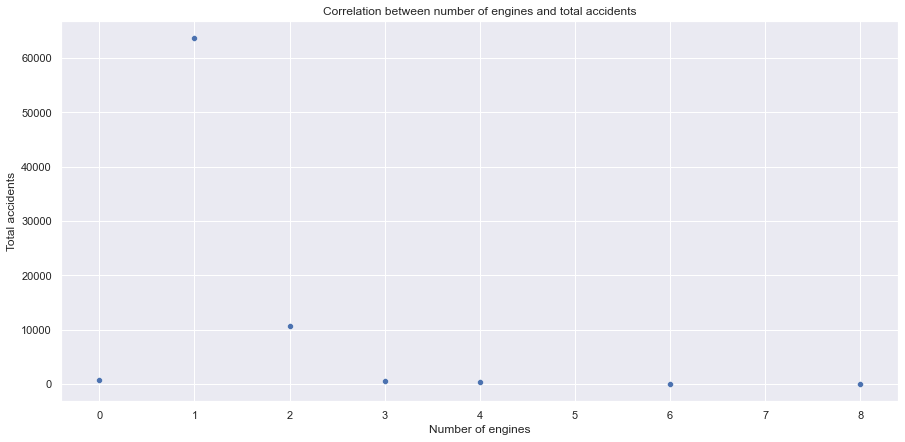

In [60]:
# scatter plot / correlation between number of engines & Total accidents
num_engines_total_accidents_plot = sns.scatterplot(data=df_engines_accidents, 
                                                   x='Number of Engines', y='Total Accidents')
num_engines_total_accidents_plot.set(xlabel='Number of engines', ylabel='Total accidents', 
                                     title='Correlation between number of engines and total accidents');

Business airplanes, also known as business jets, typically utilize two jet turbofan engines. 

***Number of Engines***
Most production business jets use two jet engines as a compromise between the operating economy of fewer engines and the ability to safely continue flight after an engine failure.
https://en.wikipedia.org/wiki/Business_jet

***Engine Type***
Most modern subsonic jet aircraft use more complex high-bypass turbofan engines. They give higher speed and greater fuel efficiency than piston and propeller aeroengines over long distances.
https://en.wikipedia.org/wiki/Jet_engine

In [61]:
# filter out older aircraft
df_filtered = df_filtered[(df_filtered['Number.of.Engines'] == 2) & 
                          (df_filtered['Engine.Type'] == 'Turbo Fan')]
df_filtered

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Airplane,CF-TLU,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,Unknown,0.0,0.0,1.0,44.0,VMC,Climb,Probable Cause
84,20020917X01907,Accident,DCA82AA011,1982-01-13,"WASHINGTON, DC",United States,Fatal(78),Destroyed,Airplane,N62AF,Boeing,737-222,No,2.0,Turbo Fan,Unknown,78.0,6.0,3.0,0.0,IMC,Takeoff,Probable Cause
149,20020917X01767,Incident,ATL82IA041,1982-01-22,"LOUISVILLE, KY",United States,Incident,Substantial,Airplane,N18FE,Dassault/sud,FALCON 20,No,2.0,Turbo Fan,Unknown,0.0,0.0,0.0,2.0,VMC,Descent,Probable Cause
522,20020917X02338,Incident,LAX82IA103,1982-03-10,"LONG BEACH, CA",United States,Incident,Substantial,Airplane,N778JA,Douglas,DC-9-82,No,2.0,Turbo Fan,Unknown,0.0,0.0,0.0,68.0,VMC,Standing,Probable Cause
737,20020917X01902,Incident,CHI82IA112,1982-04-02,"DETROIT, MI",United States,Incident,Minor,Airplane,N23BX,Rockwell,SABRELINER 65,No,2.0,Turbo Fan,Executive/corporate,0.0,0.0,0.0,8.0,VMC,Taxi,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88946,20220406104897,Accident,WPR22LA143,2022-04-02,"Van Nuys, CA",United States,Non-Fatal,Substantial,Airplane,N604RM,BOMBARDIER INC,CL-600-2B16,No,2.0,Turbo Fan,Executive/corporate,0.0,0.0,0.0,8.0,VMC,Unknown,The student pilots failure to maintain suffic...
89029,20220418104951,Accident,ERA22LA190,2022-04-17,"Caldwell, NJ",United States,Non-Fatal,Substantial,Airplane,N225SC,TEXTRON AVIATION INC,525B,No,2.0,Turbo Fan,Personal,0.0,0.0,0.0,3.0,VMC,Unknown,The flight crews failure to attain a proper t...
89204,20220623105307,Accident,DCA22LA134,2022-05-22,"Tacoma, WA",United States,Minor,Substantial,Airplane,N256WN,BOEING,737-700,No,2.0,Turbo Fan,Unknown,0.0,1.0,0.0,66.0,VMC,Unknown,During cruise flight with no reported turbulen...
89491,20220718105497,Accident,DCA22LA151,2022-07-02,"Santa Ana, CA",United States,Serious,Substantial,Airplane,N480WN,BOEING,737-700,No,2.0,Turbo Fan,Unknown,0.0,0.0,1.0,141.0,VMC,Unknown,A flight attendant received a serious injury d...


#### Add new feature "Manufacturer"

In [62]:
# Fix all 'Make' values so they are title case
df_filtered_copy = df_filtered.copy()
df_filtered_copy['Make'] = df_filtered_copy['Make'].str.title()
df_filtered_copy['Make'].value_counts()

Boeing                           607
Cessna                           169
Mcdonnell Douglas                157
Airbus                           104
Airbus Industrie                 100
                                ... 
Fairchild                          1
Corporate Jets Limited             1
Hawker Beechcraft Corporation      1
Airbus Industries                  1
Saab-Scania Ab                     1
Name: Make, Length: 80, dtype: int64

In [63]:
aircraft_make_list = sorted(df_filtered_copy['Make'].value_counts().index.tolist())
aircraft_make_list

['Aerospatiale',
 'Airbus',
 'Airbus Industrie',
 'Airbus Industries',
 'Bae',
 'Beech',
 'Beechcraft',
 'Bell',
 'Boeing',
 'Boeing Commercial Airplane Gro',
 'Boeing Company',
 'Bombardier',
 'Bombardier Aerospace, Inc.',
 'Bombardier Canadair',
 'Bombardier Inc',
 'Bombardier Learjet Corp.',
 'Bombardier, Inc.',
 'British Aerospace',
 'British Aircraft Corp. (Bac)',
 'Canadair',
 'Canadair Ltd',
 'Cessna',
 'Cessna Aircraft Company',
 'Corporate Jets Limited',
 'Dassault',
 'Dassault Aviation',
 'Dassault-Breguet',
 'Dassault/Sud',
 'Dornier',
 'Dornier Gmbh',
 'Douglas',
 'Eclipse',
 'Eclipse Aviation',
 'Eclipse Aviation Corp',
 'Eclipse Aviation Corporation',
 'Embraer',
 'Embraer S A',
 'Embraer S.A.',
 'Embraer-Empresa Brasileira De',
 'Fairchild',
 'Fairchild Dornier',
 'Fokker',
 'Gates Lear Jet',
 'Gates Learjet',
 'Gates Learjet Corp.',
 'Gates Learjet Corporation',
 'Grumman',
 'Grumman American',
 'Grumman American Avn. Corp.',
 'Gulfstream',
 'Gulfstream Aerospace',
 'Gu

***Notes***
- Aerospatiale (defunct): https://en.wikipedia.org/wiki/A%C3%A9rospatiale
    - assets were split, majority of assets now belong to Airbus
    - Aerospatiale (helicopter business) + DASA (helicopter business) = Eurocopter Group (later renamed to Airbus Helicopters)
    - Aerospatiale (remaining assets) > merged into Matra to create Aerospatiale-Matra > Aerospatiale + DASA + CASA = EADS > later renamed to Airbus 
- Airbus (parent company): https://en.wikipedia.org/wiki/Airbus
    - Airbus Industrie (defunct): now owned by Airbus through mergers/acquisitions
    - Airbus Industries (defunct)
- BAE Systems (parent company): https://en.wikipedia.org/wiki/BAE_Systems
    - British Aerospace (BAe) bought Marconi Electronic Systems > formed BAE Systems
- British Aircraft Corp. (Bac) (defunct): https://en.wikipedia.org/wiki/British_Aircraft_Corporation#Merger_speculation_and_nationalisation
- Beechcraft (brand under Textron Aviation): https://en.wikipedia.org/wiki/Beechcraft
    - brand under Beech Aircraft Corporation
    - then division under Raytheon (In 1980, Raytheon acquired Beech Aircraft Corporation)
    - then under Hawker Beechcraft
    - remains a brand under Textron Aviation
- Bell (bought by Textron): https://en.wikipedia.org/wiki/Bell_Aircraft
    - Bell Textron (division under Textron): https://en.wikipedia.org/wiki/Bell_Textron
- Boeing (parent company): https://en.wikipedia.org/wiki/Boeing
- Bombardier (parent company): https://en.wikipedia.org/wiki/Bombardier_Inc 
    - Bombardier Aviation (division of Bombardier): https://en.wikipedia.org/wiki/Bombardier_Aviation
- Bombardier Aerospace, Inc. (old name for Bombardier Aviation):
    - Bombardier Aerospace was a division in Bombardier Inc. that got renamed to Bombardier Aviation
- Canadair (acquired by Bombardier): https://en.wikipedia.org/wiki/Canadair
    - still exists as a brand used by Bombardier
- Learjet (acquired by Bombardier): https://en.wikipedia.org/wiki/Learjet
    - Learjet, Gates Learjet, Bombardier Learjet all different names over it's history
    - defunct, production ceased in 2021
- Cessna (brand under Textron Aviation): https://en.wikipedia.org/wiki/Cessna
    - Cessna Aircraft Company purchased by General Dynamics, then by Textron
- Textron Aviation (business unit of Textron): https://en.wikipedia.org/wiki/Textron_Aviation
- Dassault Aviation (part of Dassault Group): https://en.wikipedia.org/wiki/Dassault_Aviation
- Dassault/Sud: former collaboration between Dassault Aviation and Sud Aviation
    - Nord Aviation and Sud Aviation merged > formed Aérospatiale > merged to create EADS (now Airbus)
- Dornier & Dornier Gmbh (no longer exists): https://en.wikipedia.org/wiki/Dornier_Flugzeugwerke
- Douglas (now part of Boeing): https://en.wikipedia.org/wiki/Douglas_Aircraft_Company
    - Douglas Aircraft Company merged with McDonnell Aircraft to create McDonnell Douglas
- McDonnell Douglas (now part of Boeing): https://en.wikipedia.org/wiki/McDonnell_Douglas
    - merged with Boeing
- Eclipse Aviation (assets now owned by Eclipse Aerospace): https://en.wikipedia.org/wiki/Eclipse_Aviation
- Eclipse Aerospace: https://en.wikipedia.org/wiki/Eclipse_Aerospace
- Embraer: https://en.wikipedia.org/wiki/Embraer
- Fairchild & Fairchild Dornier (assets bought by M7 Aerospace): https://en.wikipedia.org/wiki/Fairchild_Aircraft
    - M7 Aerospace does not manufacture aircraft, but focuses on aerospace parts and support services
    - M7 now owned by Elbit Systems
    - After Fairchild took over Dornier's civil assets, the company was renamed to Fairchild Dornier
- Fokker (operations sold to competitors after bankruptcy): https://en.wikipedia.org/wiki/Fokker
- Grumman American & Grumman American Avn. Corp.: https://en.wikipedia.org/wiki/American_Aviation
    - American Aviation Corporation merged with Grumman to create Grumman American
- Grumman: https://en.wikipedia.org/wiki/Grumman
    - After creating "Grumman American", they joined it with their Gulfstream division, then sold it off
    - Grumman sold Gulfstream to American Jet Industries, which adopted the Gulfstream name
- Gulfstream Aerospace: https://en.wikipedia.org/wiki/Gulfstream_Aerospace
    - subsidiary of General Dynamics 
- Hawker Beechcraft (related to Beechcraft): https://en.wikipedia.org/wiki/Hawker_Beechcraft
    - Raytheon merged Beech Aircraft Corporation and Raytheon Corporate Jets to create Hawker Beechcraft
    - Raytheon sold the company to a consortium of Goldman Sachs and Onex Corporation
    - After failed sale negotiations, it emerged from bankruptcy under a new name, Beechcraft Corporation
    - Beechcraft Corporation was eventually sold to Textron Aviation
    - The "Beechcraft" brand survives under Textron  
- Hawker Siddeley (defunct): https://en.wikipedia.org/wiki/Hawker_Siddeley
    - Hawker Siddeley, British Aircraft Corporation (BAC) and Scottish Aviation merged to form British Aerospace
    - British Aerospace sold its corporate jet product line to Raytheon
- Israel Aircraft Industries: https://en.wikipedia.org/wiki/Israel_Aerospace_Industries
- Mitsubishi (defunct): https://en.wikipedia.org/wiki/Mitsubishi_Aircraft_Corporation
- North American & North American Rockwell Corp.: 
    - https://en.wikipedia.org/wiki/North_American_Aviation#Merger_and_acquisition
    - defunct, renamed to Rockwell International, then sold to Boeing
- Raytheon: https://en.wikipedia.org/wiki/Raytheon
    - Raytheon acquired Beech Aircraft Corporation
    - Acquired Corporate Jets Inc., the business jet product line of British Aerospace (now BAE Systems)
    - 2 entities merged to become Raytheon Aircraft Company
    - Raytheon sold its aircraft operations, which subsequently operated as Hawker Beechcraft
    - The company merged with United Technologies Corporation to form Raytheon Technologies
    - Raytheon Technologies renamed themselves to RTX Corporation
- Rockwell International (defunct): https://en.wikipedia.org/wiki/Rockwell_International
    - sold to Boeing
    - Rockwell (refers to aircraft built by Rockwell International)
- Saab-Scania Ab (defunct): https://en.wikipedia.org/wiki/Saab-Scania
    - The company split
    - Saab AB: https://en.wikipedia.org/wiki/Saab_AB
- Sino-Swearingen (no longer exists through different ownership): https://en.wikipedia.org/wiki/SyberJet_Aircraft
    - Founded as Swearingen Aircraft > renamed to Sino Swearingen Aircraft Company > renamed to Emivest Aerospace Corporation (after being purchased) > now named SyberJet Aircraft (after assets were purchased)
- Spectrum Aeronautical Llc (out of business): https://en.wikipedia.org/wiki/Spectrum_Aeronautical
- Sukhoi (parent company is United Aircraft Corporation): https://en.wikipedia.org/wiki/Sukhoi

***Drop rows where Make equals:***
- Aerospatiale
- Airbus Industrie
- Airbus Industries
- Bombardier Learjet Corp.
- British Aircraft Corp. (Bac)
- Learjet
- Learjet Inc
- Gates Lear Jet
- Gates Learjet
- Gates Learjet Corp.
- Gates Learjet Corporation
- Dassault/Sud
- Dornier
- Dornier Gmbh
- Fairchild
- Fairchild Dornier
- Fokker
- Grumman American
- Grumman American Avn. Corp.
- Hawker Siddeley
- Mitsubishi
- North American
- North American Rockwell Corp.
- Sino-Swearingen
- Spectrum Aeronautical Llc

In [64]:
aircraft_manufacturer_mappings = {
    "Bae": "BAE Systems", 
    "British Aerospace": "BAE Systems", 
    "Beech": "Textron Aviation", 
    "Beechcraft": "Textron Aviation", 
    "Boeing Commercial Airplane Gro": "Boeing", # a division of Boeing
    "Boeing Company": "Boeing", # same thing
    "The Boeing Company": "Boeing", # same thing
    "Bombardier Aerospace, Inc.": "Bombardier", # division of Bombardier
    "Bombardier Canadair": "Bombardier", # acquired by Bombardier
    "Bombardier Inc": "Bombardier", # same thing
    "Bombardier, Inc.": "Bombardier", # same thing
    "Canadair": "Bombardier", # acquired by Bombardier
    "Canadair Ltd": "Bombardier", # acquired by Bombardier
    "Cessna Aircraft Company": "Textron Aviation", # acquired by Textron Aviation
    "Cessna": "Textron Aviation", # brand under Textron Aviation
    "Textron Aviation Inc": "Textron Aviation", # same thing
    "Dassault": "Dassault Aviation", # same thing
    "Dassault-Breguet": "Dassault Aviation", # former name after merger
    "Douglas": "Boeing", # went through mergers, now owned by Boeing
    "Mcdonnell Douglas": "Boeing", # merged with Boeing
    "Mcdonnell Douglas Aircraft Co": "Boeing", # merged with Boeing
    "Mcdonnell Douglas Corporation": "Boeing", # merged with Boeing
    "Eclipse": "Eclipse Aerospace", # Eclipse Aviation > Eclipse Aerospace
    "Eclipse Aviation": "Eclipse Aerospace",
    "Eclipse Aviation Corp": "Eclipse Aerospace",
    "Eclipse Aviation Corporation": "Eclipse Aerospace",  
    "Embraer S A": "Embraer", # same thing
    "Embraer S.A.": "Embraer", # same thing
    "Embraer-Empresa Brasileira De": "Embraer", # same thing
    "Gulfstream": "Gulfstream Aerospace", # same thing
    "Gulfstream Aerospace Corp.": "Gulfstream Aerospace", # same thing
    "Gulfstream American Corp.": "Gulfstream Aerospace", # same thing
    "Hawker Beechcraft": "Textron Aviation", # Beechcraft now a brand under Textron Aviation
    "Hawker Beechcraft Corp": "Textron Aviation", # Beechcraft now a brand under Textron Aviation
    "Hawker Beechcraft Corporation": "Textron Aviation", # Beechcraft now a brand under Textron Aviation
    "Iai": "Israel Aircraft Industries", # same thing
    "Raytheon Aircraft Company": "Textron Aviation", # Raytheon sold its aircraft operations
    "Raytheon Corporate Jets": "Textron Aviation", # Raytheon sold its aircraft operations
    "Raytheon Corporate Jets Inc": "Textron Aviation", # Raytheon sold its aircraft operations
    "Raytheon": "RTX Corporation", # renamed
    "Rockwell International": "Boeing", # sold to Boeing
    "Rockwell": "Boeing", # sold to Boeing
    "Saab-Scania Ab": "Saab AB" # original company split
}

aircraft_make_legacy_list = [
    "Aerospatiale",
    "Airbus Industrie",
    "Airbus Industries",
    "Bombardier Learjet Corp.",
    "British Aircraft Corp. (Bac)",
    "Learjet",
    "Learjet Inc",
    "Gates Lear Jet",
    "Gates Learjet",
    "Gates Learjet Corp.",
    "Gates Learjet Corporation",
    "Dassault/Sud",
    "Dornier",
    "Dornier Gmbh",
    "Fairchild",
    "Fairchild Dornier",
    "Fokker",
    "Grumman",
    "Grumman American",
    "Grumman American Avn. Corp.",
    "Hawker Siddeley",
    "Mitsubishi",
    "North American",
    "North American Rockwell Corp.",
    "Sino-Swearingen",
    "Spectrum Aeronautical Llc"
]

# create new column Manufacturer
df_filtered_copy['Manufacturer'] = df_filtered_copy['Make'].replace(aircraft_manufacturer_mappings)
df_filtered_copy = df_filtered_copy[~df_filtered_copy['Make'].isin(aircraft_make_legacy_list)]
#df_filtered_copy[['Make','Manufacturer']]
df_filtered_copy['Manufacturer'].value_counts()

Boeing                        830
Textron Aviation              205
Bombardier                    131
Airbus                        104
Embraer                        86
Gulfstream Aerospace           35
Israel Aircraft Industries     24
Dassault Aviation              20
BAE Systems                    14
Eclipse Aerospace               9
RTX Corporation                 7
Bell                            1
Sabreliner Corp.                1
Corporate Jets Limited          1
Saab AB                         1
Sukhoi                          1
Name: Manufacturer, dtype: int64

Investigate further:
- Sabreliner Corp.: https://en.wikipedia.org/wiki/North_American_Sabreliner
    - Model "NA-265-80" was a business jet formerly manufactured by North American Aviation
- Corporate Jets Limited: https://en.wikipedia.org/wiki/British_Aerospace_125
    - Model "BAE125-800A" was a business jet formerly manufactured by British Aerospace

In [65]:
df_filtered_copy[(df_filtered_copy['Make'] == 'Sabreliner Corp.') | 
                 (df_filtered_copy['Make'] == 'Corporate Jets Limited')]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Manufacturer
7038,20001214X45225,Incident,ATL84IA065,1983-12-15,"CHERRY POINT, NC",United States,Incident,Minor,Airplane,N60,Sabreliner Corp.,NA-265-80,No,2.0,Turbo Fan,Public Aircraft,0.0,0.0,0.0,3.0,IMC,Takeoff,Probable Cause,Sabreliner Corp.
60593,20060512X00563,Incident,CHI06IA127,2006-05-04,"Lincoln, NE",United States,Incident,Substantial,Airplane,N71MT,Corporate Jets Limited,BAE125-800A,No,2.0,Turbo Fan,Flight Test,0.0,0.0,6.0,1.0,VMC,Other,Probable Cause,Corporate Jets Limited


In [66]:
# remove more legacy aircraft
df_filtered_copy = df_filtered_copy[~df_filtered_copy['Make'].isin(['Sabreliner Corp.', 'Corporate Jets Limited'])]
df_filtered_copy['Manufacturer'].value_counts()

Boeing                        830
Textron Aviation              205
Bombardier                    131
Airbus                        104
Embraer                        86
Gulfstream Aerospace           35
Israel Aircraft Industries     24
Dassault Aviation              20
BAE Systems                    14
Eclipse Aerospace               9
RTX Corporation                 7
Bell                            1
Saab AB                         1
Sukhoi                          1
Name: Manufacturer, dtype: int64

#### Subset: manufacturers that make business jets only

- Boeing: https://en.wikipedia.org/wiki/Boeing_Business_Jet
- Textron: https://en.wikipedia.org/wiki/Textron_Aviation
- Airbus: https://en.wikipedia.org/wiki/Airbus_Corporate_Jets
- Bombardier: https://en.wikipedia.org/wiki/Bombardier_Aviation
- Embraer: https://en.wikipedia.org/wiki/Embraer
- Gulfstream Aerospace: https://en.wikipedia.org/wiki/Gulfstream_Aerospace
- Israel Aircraft Industries: https://en.wikipedia.org/wiki/Israel_Aerospace_Industries
- Eclipse Aerospace: https://en.wikipedia.org/wiki/Eclipse_550
- BAE Systems: https://en.wikipedia.org/wiki/BAE_Systems#Products (focused on military equipment)
- RTX Corporation: https://en.wikipedia.org/wiki/RTX_Corporation (don't manufacture aircraft anymore)
    - RTX manufactures aircraft engines, avionics, aerostructures, cybersecurity solutions, guided missiles, air defense systems, satellites, and drones. 
- Dassault Aviation: https://en.wikipedia.org/wiki/Dassault_Falcon_family
- Bell: https://en.wikipedia.org/wiki/Bell_Textron (don't manufacture business jets)
- Saab AB: https://en.wikipedia.org/wiki/Saab_AB#Aircraft_production (don't manufacture aircraft anymore)
- Sukhoi: https://en.wikipedia.org/wiki/List_of_Sukhoi_aircraft (don't manufacture business jets)

In [67]:
# filter out those manufacturers that don't make aircraft / business jets anymore
non_business_jet_list = [
    "BAE Systems",
    "RTX Corporation",
    "Bell",
    "Saab AB",
    "Sukhoi"
]

df_filtered_copy = df_filtered_copy[~df_filtered_copy['Manufacturer'].isin(non_business_jet_list)]
df_filtered_copy['Manufacturer'].value_counts()

Boeing                        830
Textron Aviation              205
Bombardier                    131
Airbus                        104
Embraer                        86
Gulfstream Aerospace           35
Israel Aircraft Industries     24
Dassault Aviation              20
Eclipse Aerospace               9
Name: Manufacturer, dtype: int64

## Data Analysis

### Level of Injury

*Total.Fatal/Serious/Minor.Injuries & Total.Uninjured*

In [68]:
# analyse injury numbers
df_injuries_by_manufacturer = df_filtered_copy.groupby('Manufacturer')[
    ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].sum()

df_injuries_by_manufacturer['Total.Injured'] = df_injuries_by_manufacturer[
    ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum(axis=1)

df_injuries_by_manufacturer['Total.Passengers'] = df_injuries_by_manufacturer[
    ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].sum(axis=1)

df_injuries_by_manufacturer['Injury.Rate (%)'] = (df_injuries_by_manufacturer['Total.Injured'] / 
                                              df_injuries_by_manufacturer['Total.Passengers']) * 100

df_injuries_by_manufacturer['Fatal.Injury.Rate (%)'] = (df_injuries_by_manufacturer['Total.Fatal.Injuries'] / 
                                              df_injuries_by_manufacturer['Total.Passengers']) * 100

df_injuries_by_manufacturer['Serious.Injury.Rate (%)'] = (df_injuries_by_manufacturer['Total.Serious.Injuries'] / 
                                              df_injuries_by_manufacturer['Total.Passengers']) * 100

df_injuries_by_manufacturer['Minor.Injury.Rate (%)'] = (df_injuries_by_manufacturer['Total.Minor.Injuries'] / 
                                              df_injuries_by_manufacturer['Total.Passengers']) * 100

df_injuries_by_manufacturer_sorted = df_injuries_by_manufacturer.sort_values(by='Injury.Rate (%)', ascending=False)

df_injuries_by_manufacturer_sorted

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Injured,Total.Passengers,Injury.Rate (%),Fatal.Injury.Rate (%),Serious.Injury.Rate (%),Minor.Injury.Rate (%)
Manufacturer,,,,,,,,,,
Gulfstream Aerospace,31.0,17.0,10.0,175.0,58.0,233.0,24.892704,13.304721,7.296137,4.291845
Israel Aircraft Industries,29.0,0.0,2.0,94.0,31.0,125.0,24.800000,23.200000,0.000000,1.600000
Dassault Aviation,8.0,3.0,7.0,74.0,18.0,92.0,19.565217,8.695652,3.260870,7.608696
Textron Aviation,111.0,30.0,33.0,771.0,174.0,945.0,18.412698,11.746032,3.174603,3.492063
Eclipse Aerospace,0.0,3.0,0.0,22.0,3.0,25.0,12.000000,0.000000,12.000000,0.000000
Airbus,277.0,100.0,55.0,11480.0,432.0,11912.0,3.626595,2.325386,0.839490,0.461719
Boeing,1210.0,892.0,1258.0,90873.0,3360.0,94233.0,3.565630,1.284051,0.946590,1.334989
Bombardier,61.0,40.0,34.0,4576.0,135.0,4711.0,2.865634,1.294842,0.849077,0.721715
Embraer,4.0,37.0,33.0,3685.0,74.0,3759.0,1.968609,0.106411,0.984304,0.877893


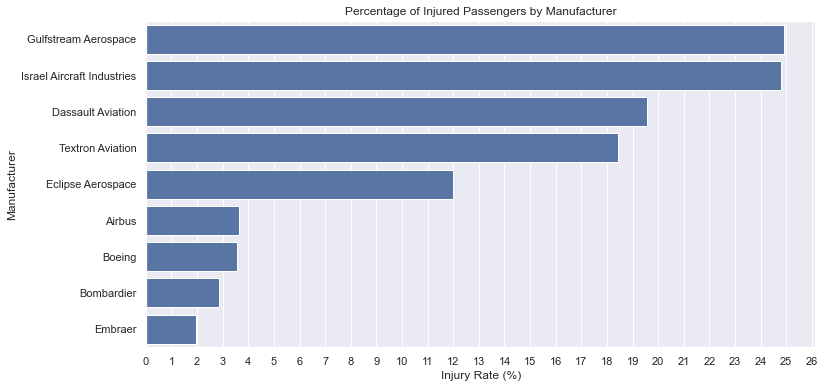

In [69]:
# plot number of injuries
fig, ax = plt.subplots(figsize=(12, 6))

# Total.Fatal/Serious/Minor.Injuries & Total.Uninjured
#ax.barh(df_injuries_by_manufacturer_sorted.index, df_injuries_by_manufacturer_sorted['Total.Fatal.Injuries'], 
#       label='Total Fatal Injuries')
#ax.barh(df_injuries_by_manufacturer_sorted.index, df_injuries_by_manufacturer_sorted['Total.Serious.Injuries'], 
#       left=df_injuries_by_manufacturer_sorted['Total.Fatal.Injuries'], label='Total Serious Injuries')
#ax.barh(df_injuries_by_manufacturer_sorted.index, df_injuries_by_manufacturer_sorted['Total.Minor.Injuries'], 
#        left=df_injuries_by_manufacturer_sorted['Total.Fatal.Injuries'] + 
#        df_injuries_by_manufacturer_sorted['Total.Serious.Injuries'], label='Total Minor Injuries')
#ax.barh(df_injuries_by_manufacturer_sorted.index, df_injuries_by_manufacturer_sorted['Total.Uninjured'], 
#        left=df_injuries_by_manufacturer_sorted['Total.Fatal.Injuries'] + 
#        df_injuries_by_manufacturer_sorted['Total.Serious.Injuries'] + 
#        df_injuries_by_manufacturer_sorted['Total.Minor.Injuries'], label='Total Uninjured')

# Total.Injured & Total.Uninjured
#ax.barh(df_injuries_by_manufacturer_sorted.index, df_injuries_by_manufacturer_sorted['Total.Injured'], 
#       label='Total Injuried')
#ax.barh(df_injuries_by_manufacturer_sorted.index, df_injuries_by_manufacturer_sorted['Total.Uninjured'], 
#       left=df_injuries_by_manufacturer_sorted['Total.Injured'], label='Total Uninjured')

# Injury.Rate (%) using Matplotlib
#ax.barh(df_injuries_by_manufacturer_sorted.index, df_injuries_by_manufacturer_sorted['Injury.Rate (%)'], 
#       label='Percent of Injured Passengers')
#ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
#ax.set_title('Percentage of Injured Passengers by Manufacturer')
#ax.set_xlabel('Percent of Injured Passengers')
#ax.set_ylabel('Manufacturer');

# Injury.Rate (%) using Seaborn
injury_rate_plot = sns.barplot(x=df_injuries_by_manufacturer_sorted['Injury.Rate (%)'], 
                               y=df_injuries_by_manufacturer_sorted.index, 
                               data=df_injuries_by_manufacturer_sorted, orient='h', color=default_palette[0]) 
injury_rate_plot.set(xlabel='Injury Rate (%)', ylabel='Manufacturer', 
                     title='Percentage of Injured Passengers by Manufacturer')
injury_rate_plot.xaxis.set_major_locator(ticker.MultipleLocator(1));

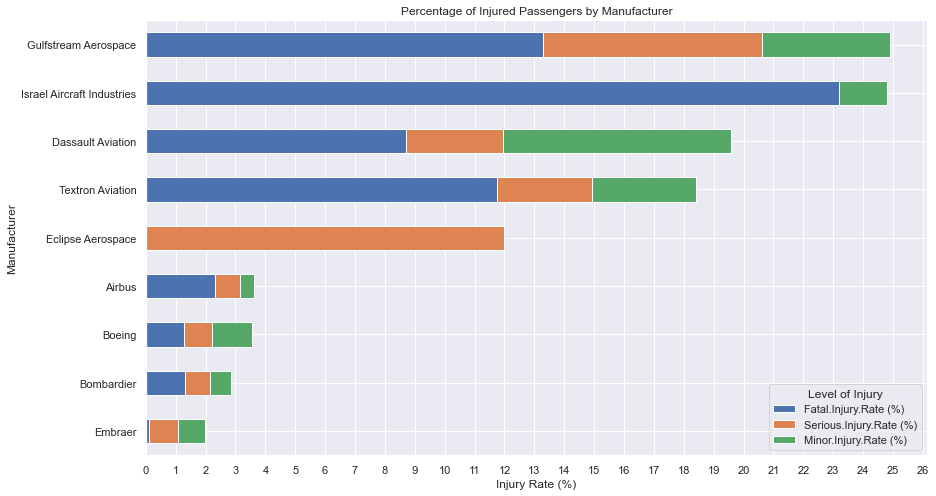

In [70]:
# Fatal.Injury.Rate (%), Serious.Injury.Rate (%), Minor.Injury.Rate (%) using Pandas
df_injuries_by_manufacturer_percents = df_injuries_by_manufacturer.sort_values(by='Injury.Rate (%)', 
                                                                               ascending=True)
df_injuries_by_manufacturer_percents = df_injuries_by_manufacturer_percents[['Fatal.Injury.Rate (%)', 
                                                                             'Serious.Injury.Rate (%)', 
                                                                             'Minor.Injury.Rate (%)']]
injury_rate_detailed_plot = df_injuries_by_manufacturer_percents.plot.barh(stacked=True, figsize=(14, 8))
injury_rate_detailed_plot.set_title('Percentage of Injured Passengers by Manufacturer')
injury_rate_detailed_plot.set_xlabel('Injury Rate (%)')
injury_rate_detailed_plot.set_ylabel('Manufacturer')
injury_rate_detailed_plot.legend(title='Level of Injury')
injury_rate_detailed_plot.xaxis.set_major_locator(ticker.MultipleLocator(1));

#### Recommendation 1

***Embraer*** airplanes have the lowest injury rate (%) based on passengers that have been involved in accidents/incidents involving Embraer airplanes. 

`Injury Rate (%) = (Total Injured Passengers / Total Passengers) * 100`

***Bombardier, Boeing and Airbus*** also have a low injury rate (< 4%).

### Accidents vs Incidents

*Investigation.Type*

In [71]:
# analyse number of accidents vs incidents
pivot_acc_inc = pd.pivot_table(df_filtered_copy, values='Total.Uninjured', index='Manufacturer', 
                               columns='Investigation.Type', aggfunc='size', fill_value=0)
pivot_acc_inc_sorted = pivot_acc_inc.sort_values(by=['Accident','Incident'], ascending=[False,False])
pivot_acc_inc_stacked = pivot_acc_inc_sorted.stack().reset_index().rename(columns={0: 'Total.Occurrences'})

# percentage of accidents vs incidents by manufacturer
pivot_acc_inc_percentages = pivot_acc_inc.copy()
pivot_acc_inc_percentages['Accident.Rate (%)'] = (pivot_acc_inc_percentages['Accident'] / 
                                                  (pivot_acc_inc_percentages['Accident'] + 
                                                   pivot_acc_inc_percentages['Incident'])) * 100
pivot_acc_inc_percentages['Incident.Rate (%)'] = (pivot_acc_inc_percentages['Incident'] / 
                                                  (pivot_acc_inc_percentages['Accident'] + 
                                                   pivot_acc_inc_percentages['Incident'])) * 100
pivot_acc_inc_percentages.drop(columns=['Accident', 'Incident'], inplace=True)
pivot_acc_inc_percentages_sorted = pivot_acc_inc_percentages.sort_values(by=['Accident.Rate (%)', 
                                                                             'Incident.Rate (%)'], 
                                                                         ascending=[False,False])
pivot_acc_inc_percentages_stacked = pivot_acc_inc_percentages_sorted.stack().reset_index()
pivot_acc_inc_percentages_stacked = pivot_acc_inc_percentages_stacked.rename(columns={0: 'Occurrence.Rate (%)'})
pivot_acc_inc_percentages_stacked

,Manufacturer,Investigation.Type,Occurrence.Rate (%)
0,Textron Aviation,Accident.Rate (%),80.487805
1,Textron Aviation,Incident.Rate (%),19.512195
2,Dassault Aviation,Accident.Rate (%),80.000000
3,Dassault Aviation,Incident.Rate (%),20.000000
4,Israel Aircraft Industries,Accident.Rate (%),79.166667
5,Israel Aircraft Industries,Incident.Rate (%),20.833333
6,Gulfstream Aerospace,Accident.Rate (%),74.285714
7,Gulfstream Aerospace,Incident.Rate (%),25.714286
8,Embraer,Accident.Rate (%),70.930233
9,Embraer,Incident.Rate (%),29.069767


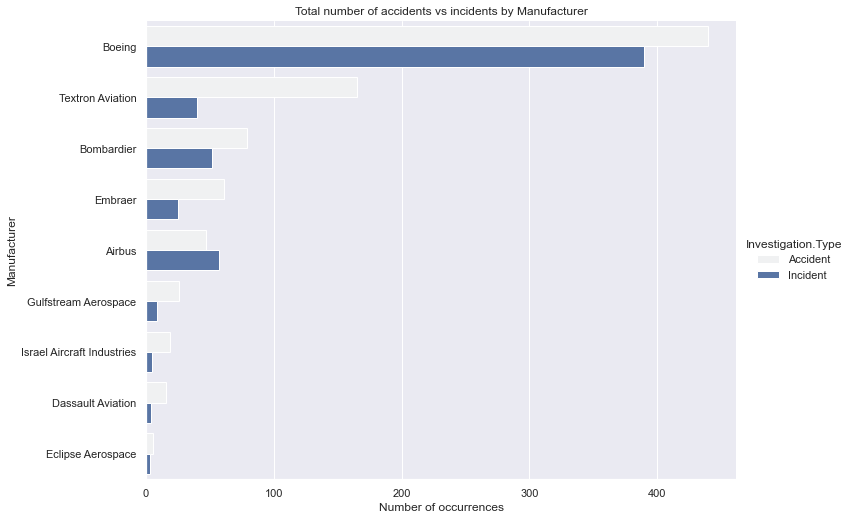

In [72]:
# plot accidents vs incidents numbers
incident_type_plot = sns.catplot(data=pivot_acc_inc_stacked, kind='bar', x='Total.Occurrences', 
                                 y='Manufacturer', hue='Investigation.Type', 
                                 color=default_palette[0], height=7, aspect=1.5)
incident_type_plot.set(xlabel='Number of occurrences', ylabel='Manufacturer', 
                       title='Total number of accidents vs incidents by Manufacturer');

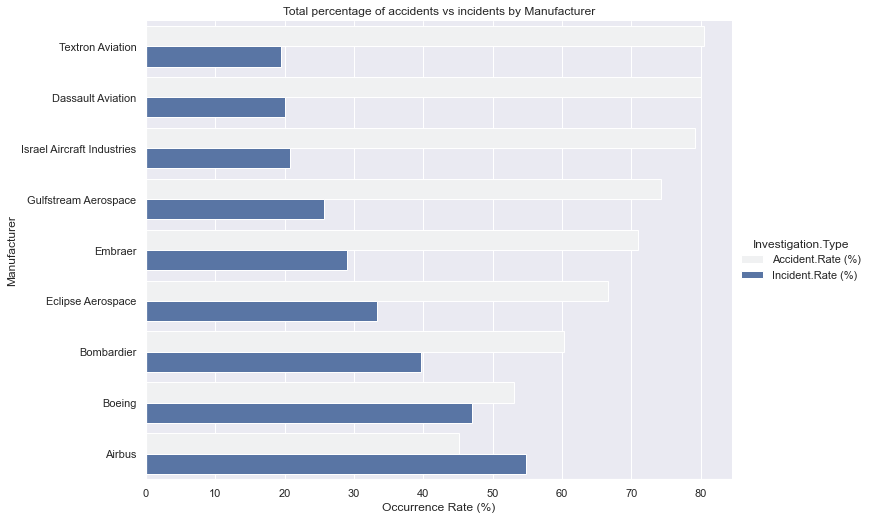

In [73]:
# plot accidents vs incidents percents
incident_type_percent_plot = sns.catplot(data=pivot_acc_inc_percentages_stacked, kind='bar', 
                                         x='Occurrence.Rate (%)', y='Manufacturer', hue='Investigation.Type', 
                                         color=default_palette[0], height=7, aspect=1.5)
incident_type_percent_plot.set(xlabel='Occurrence Rate (%)', ylabel='Manufacturer', 
                               title='Total percentage of accidents vs incidents by Manufacturer');

#### Recommendation 2

***Airbus*** airplanes have the lowest accident rate (%) based on total number of accidents/incidents involving Airbus airplanes. 

`Accident Rate (%) = (Total Accidents / (Total Accidents + Total Incidents)) * 100`

### Level of Aircraft Damage

*Aircraft.damage*

In [74]:
# analyse aircraft damage numbers
pivot_damage = pd.pivot_table(df_filtered_copy, values='Total.Uninjured', index='Manufacturer', 
                              columns='Aircraft.damage', aggfunc='size', fill_value=0)
pivot_damage_sorted = pivot_damage.sort_values(by=['Destroyed','Substantial','Minor'], ascending=[True,True,True])

# analyse aircraft damage percentages
pivot_damage_percentages = pivot_damage.copy()
pivot_damage_percentages['Total'] = (pivot_damage_percentages['Destroyed'] + 
                                     pivot_damage_percentages['Substantial'] + 
                                     pivot_damage_percentages['Minor'])
pivot_damage_percentages['Destroyed (%)'] = (pivot_damage_percentages['Destroyed'] / 
                                             pivot_damage_percentages['Total']) * 100
pivot_damage_percentages['Substantial (%)'] = (pivot_damage_percentages['Substantial'] / 
                                               pivot_damage_percentages['Total']) * 100
pivot_damage_percentages['Minor (%)'] = (pivot_damage_percentages['Minor'] / 
                                         pivot_damage_percentages['Total']) * 100
pivot_damage_percentages = pivot_damage_percentages[['Destroyed (%)', 'Substantial (%)', 'Minor (%)']]
pivot_damage_percentages_sorted = pivot_damage_percentages.sort_values(by=['Destroyed (%)',
                                                                           'Substantial (%)',
                                                                           'Minor (%)'], 
                                                                       ascending=[True,True,True])
pivot_damage_percentages_sorted

Aircraft.damage,Destroyed (%),Substantial (%),Minor (%)
Manufacturer,,,
Eclipse Aerospace,0.000000,88.888889,11.111111
Embraer,1.162791,80.232558,18.604651
Boeing,3.253012,69.036145,27.710843
Airbus,4.807692,73.076923,22.115385
Bombardier,5.343511,70.229008,24.427481
Gulfstream Aerospace,11.428571,68.571429,20.000000
Textron Aviation,17.560976,71.707317,10.731707
Dassault Aviation,20.000000,60.000000,20.000000
Israel Aircraft Industries,29.166667,54.166667,16.666667


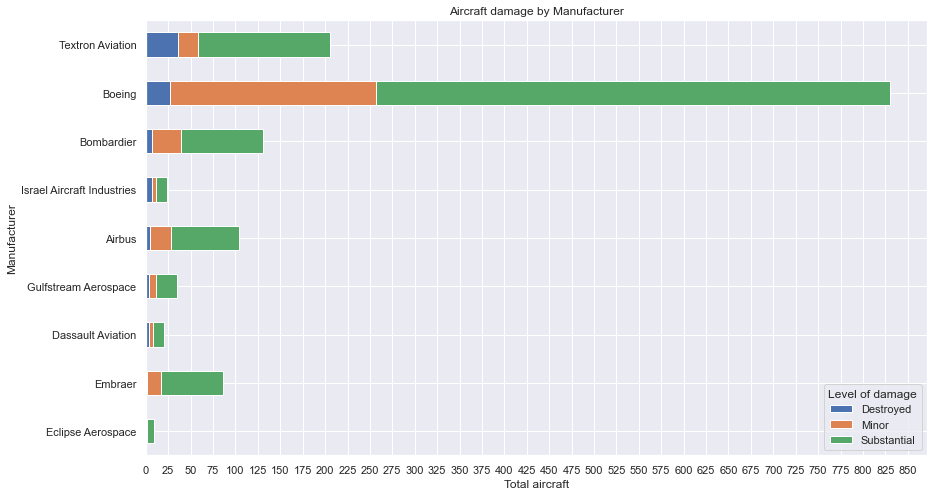

In [75]:
# plot aircraft damage by numbers
aircraft_damage_plot = pivot_damage_sorted.plot.barh(stacked=True, figsize=(14, 8))
aircraft_damage_plot.set_title('Aircraft damage by Manufacturer')
aircraft_damage_plot.set_xlabel('Total aircraft')
aircraft_damage_plot.set_ylabel('Manufacturer')
aircraft_damage_plot.legend(title='Level of damage')
aircraft_damage_plot.xaxis.set_major_locator(ticker.MultipleLocator(25));

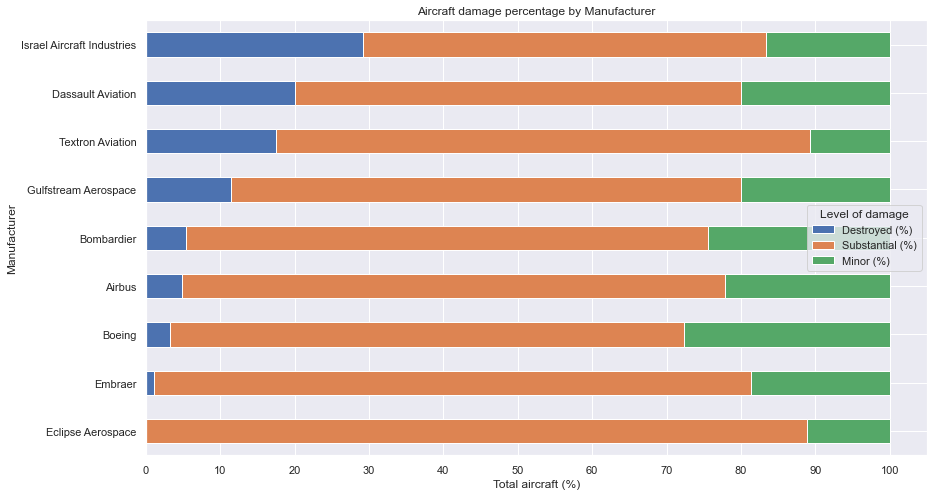

In [76]:
# plot aircraft damage by percentages
aircraft_damage_plot = pivot_damage_percentages_sorted.plot.barh(stacked=True, figsize=(14, 8))
aircraft_damage_plot.set_title('Aircraft damage percentage by Manufacturer')
aircraft_damage_plot.set_xlabel('Total aircraft (%)')
aircraft_damage_plot.set_ylabel('Manufacturer')
aircraft_damage_plot.legend(title='Level of damage')
aircraft_damage_plot.xaxis.set_major_locator(ticker.MultipleLocator(10));

#### Recommendation 3

In the event of an aviation accident or incident, ***Boeing*** airplanes have the lowest rate (%) of the aircraft sustaining major (destroyed or substantial) damage compared with other manufacturers. 

This is an important consideration as the more damaged the aircraft, the higher chance of passengers getting injured and also, it maybe costly to replace or repair aircraft that suffer major damage after an accident or incident. 